In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [3]:
#@title Obtener datos

!gdown --id 17l6ZXBP7rxlroPtYQKzco23aK3qVghyS
!gdown --id 1nbXoImRyYC5zoyh19VPftS51xumaRvG6


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17l6ZXBP7rxlroPtYQKzco23aK3qVghyS
To: /content/X.npy
100% 32.8M/32.8M [00:00<00:00, 37.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nbXoImRyYC5zoyh19VPftS51xumaRvG6
To: /content/y.npy
100% 6.70k/6.70k [00:00<00:00, 15.1MB/s]


In [6]:
X_raw = np.load('X.npy')
print(type(X_raw))
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
      X.append(resize(x, size))
X = np.array(X)

<class 'numpy.ndarray'>


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [44]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 6.0 MB/s eta 0:00:00
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

bs = 16
lr = 0.0005
size= (28,28)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*size, 1)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [10]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
41/41 [==============================] - 3s 36ms/step - loss: 2.3044 - accuracy: 0.1037 - val_loss: 2.3025 - val_accuracy: 0.1091
Epoch 2/400
41/41 [==============================] - 1s 33ms/step - loss: 2.3029 - accuracy: 0.1052 - val_loss: 2.3009 - val_accuracy: 0.1152
Epoch 3/400
41/41 [==============================] - 2s 56ms/step - loss: 2.3013 - accuracy: 0.1082 - val_loss: 2.2993 - val_accuracy: 0.1212
Epoch 4/400
41/41 [==============================] - 3s 74ms/step - loss: 2.2998 - accuracy: 0.1113 - val_loss: 2.2977 - val_accuracy: 0.1273
Epoch 5/400
41/41 [==============================] - 3s 65ms/step - loss: 2.2982 - accuracy: 0.1143 - val_loss: 2.2961 - val_accuracy: 0.1394
Epoch 6/400
41/41 [==============================] - 3s 72ms/step - loss: 2.2966 - accuracy: 0.1189 - val_loss: 2.2946 - val_accuracy: 0.1394
Epoch 7/400
41/41 [==============================] - 2s 46ms/step - loss: 2.2951 - accuracy: 0.1159 - val_loss: 2.2930 - val_accuracy: 0.1455
Epoch 

In [11]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_accuracy = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_accuracy, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('acc')
    for ax in axes: ax.legend()

Loss     = 0.1013
Accuracy = 0.9636


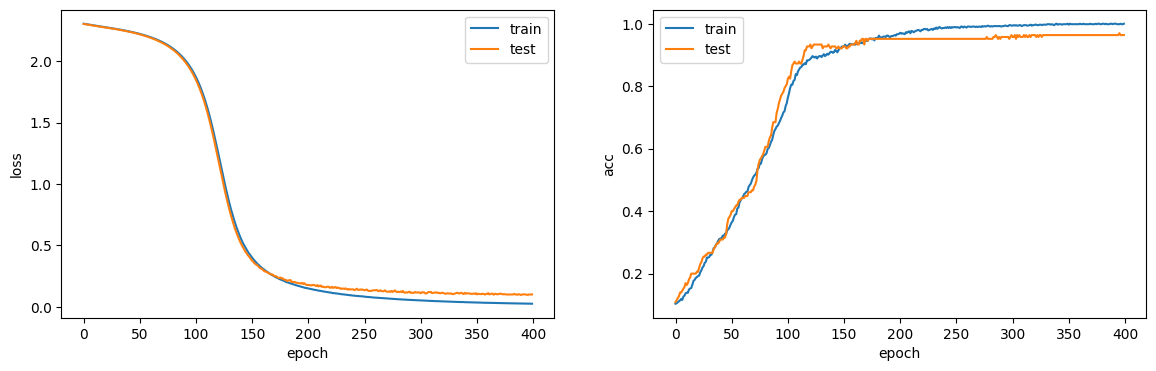

In [12]:
show_results(model, log)

(28, 28)


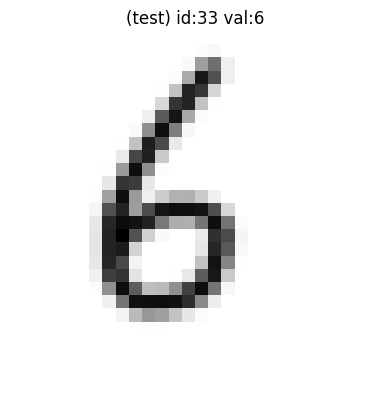

In [38]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
print(im.shape)
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im[:,:], cmap='gray')
plt.show()

In [41]:
print(im)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.56507284e-09 7.54851762e-07 2.29777408e-06
  9.49641886e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.78026161e-08 1.93561591e-04 1.24693036e-02 2.77101099e-02
  2.06380848e-03 1.93079017e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [39]:
salida = model.predict(im[None,:,:])[0]
salida

1/1 [==============================] - 0s 34ms/step


array([3.2028559e-04, 3.2936298e-06, 2.6061358e-05, 3.6047061e-06,
       2.7888118e-05, 2.0897305e-06, 9.9678421e-01, 2.8236059e-06,
       2.8204480e-03, 9.4484967e-06], dtype=float32)

[]

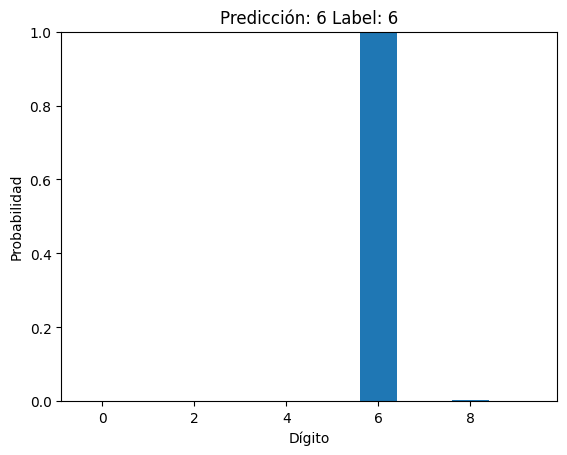

In [40]:
plt.figure()
plt.title("Predicción: {} Label: {}".format(salida.argmax(), label ))
plt.ylabel("Probabilidad")
plt.xlabel("Dígito")
plt.ylim([0,1])
plt.bar(np.arange(10), salida)
plt.plot()

In [21]:
model.save('model.keras')